孟念，1800092850

# 第三次个人作业（机器学习 + 社会网络分析，满分15分）

### 第一部分：机器学习（本部分满分10分）

1.1（共6分）请针对Cylinder Bands数据集（bands.data文件）以最后一个字段（band type）为标签，利用第5个至第39个字段为特征建立分类模型。  
数据集介绍请参考[链接](https://archive.ics.uci.edu/ml/datasets/Cylinder+Bands)。注意，模型准确率不影响本作业的得分。

作业具体要求如下：

1.1.1 数据预处理（2分）  
(1) 选择合适的预处理处理方式对标称变量编码（1分）；   
(2) 找到缺失值，并选择合适方式对缺失值填充（1分）。  


1. timestamp: numeric;19500101 - 21001231
2. cylinder number: nominal
3. customer: nominal;
4. job number: nominal;
5. grain screened: nominal; yes, no
6. ink color: nominal; key, type
7. proof on ctd ink: nominal; yes, no
8. blade mfg: nominal; benton, daetwyler, uddeholm
9. cylinder division: nominal; gallatin, warsaw, mattoon
10. paper type: nominal; uncoated, coated, super
11. ink type: nominal; uncoated, coated, cover
12. direct steam: nominal; use; yes, no *
13. solvent type: nominal; xylol, lactol, naptha, line, other
14. type on cylinder: nominal; yes, no
15. press type: nominal; use; 70 wood hoe, 70 motter, 70 albert, 94 motter
16. press: nominal; 821, 802, 813, 824, 815, 816, 827, 828
17. unit number: nominal; 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
18. cylinder size: nominal; catalog, spiegel, tabloid
19. paper mill location: nominal; north us, south us, canadian, scandanavian, mid european
20. plating tank: nominal; 1910, 1911, other
21. proof cut: numeric; 0-100
22. viscosity: numeric; 0-100
23. caliper: numeric; 0-1.0
24. ink temperature: numeric; 5-30
25. humifity: numeric; 5-120
26. roughness: numeric; 0-2
27. blade pressure: numeric; 10-75
28. varnish pct: numeric; 0-100
29. press speed: numeric; 0-4000
30. ink pct: numeric; 0-100
31. solvent pct: numeric; 0-100
32. ESA Voltage: numeric; 0-16
33. ESA Amperage: numeric; 0-10
34. wax: numeric ; 0-4.0
35. hardener: numeric; 0-3.0
36. roller durometer: numeric; 15-120
37. current density: numeric; 20-50
38. anode space ratio: numeric; 70-130
39. chrome content: numeric; 80-120
40. band type: nominal; class; band, no band *

In [1]:
import pandas as pd

df = pd.read_csv("bands.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2.0,TABLOID,NorthUS,1911,55,46,0.2,17,78,0.75,20,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2.0,TABLOID,NorthUS,?,55,46,0.3,15,80,0.75,20,6.6,1900,54.9,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,815,9.0,CATALOG,NorthUS,?,62,40,0.433,16,80,?,30,6.5,1850,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,9.0,CATALOG,NorthUS,1910,52,40,0.3,16,75,0.3125,30,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,816,2.0,TABLOID,?,1910,50,46,0.3,17,80,0.75,30,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [2]:
# 不关注前5列
df = df.loc[:, 5:]

# NaN?
df[df.isnull().any(axis=1)]

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
521,key,?,?,gallatin,uncoated,uncoated,?,?,yes,Motter94,824,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,0.200,17,84,0.8125,27,?,1865,?,?,?,?,1.5,0.7,?,40,109.1,95,band,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 那两个NaN很多也没有标签，所以没有用
df.drop(df[df.isnull().any(axis=1)].index, axis=0, inplace=True)

In [4]:
# 数据查看
for col in df.columns:

  sub_df = df[col].value_counts()
  sub_df = sub_df.sort_index()

  print("COLUMN: ", col, "\n")

  print(sub_df.head(10))

  print("-"*10)

df.info()

COLUMN:  5 

KEY    495
KeY      7
key     37
Name: 5, dtype: int64
----------
COLUMN:  6 

?       56
NO      22
YES    461
Name: 6, dtype: int64
----------
COLUMN:  7 

?            59
BENTON      479
UDDEHOLM      1
Name: 7, dtype: int64
----------
COLUMN:  8 

GALLATIN    502
gallatin     37
Name: 8, dtype: int64
----------
COLUMN:  9 

COATED      213
UNCOATED    289
coated       10
super        23
uncoated      4
Name: 9, dtype: int64
----------
COLUMN:  10 

COATED      278
COVER        15
UNCOATED    209
coated       13
cover         3
uncoated     21
Name: 10, dtype: int64
----------
COLUMN:  11 

?       24
NO     500
YES      2
no      13
Name: 11, dtype: int64
----------
COLUMN:  12 

?          54
LINE      468
NAPTHA      2
XYLOL      15
Name: 12, dtype: int64
----------
COLUMN:  13 

?       18
NO     134
YES    357
no       2
yes     28
Name: 13, dtype: int64
----------
COLUMN:  14 

Albert70      78
Motter70      48
Motter94     237
WoodHoe70    176
Name: 14, dtype: in

In [5]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

# 第五个没有用
df.drop(5,axis=1, inplace=True)

# 第七个没有用 只有一个样本不是udd的
df.drop(7,axis=1, inplace=True)

# 第八个都是gallatin所以没有用
df.drop(8,axis=1, inplace=True)

In [6]:
import numpy as np

# 把nominal的数据成为dummies > ? 会有自己的category
data = pd.get_dummies(df, columns=[6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

for col in data:
  # 不改变标签
  if col == 39:
    continue
  data.loc[data[col] == "?", col] = data.loc[data[col] != "?", col].median()

data

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,6_?,6_no,6_yes,9_coated,9_super,9_uncoated,10_coated,10_cover,10_uncoated,11_?,11_no,11_yes,12_?,12_line,12_naptha,12_xylol,13_?,13_no,13_yes,14_albert70,14_motter70,14_motter94,14_woodhoe70,15_802,15_813,15_815,15_816,15_821,15_824,15_827,15_828,16_1.0,16_2.0,16_5.0,16_6.0,16_7.0,16_9.0,16_10.0,17_?,17_catalog,17_spiegel,17_tabloid,18_?,18_canadian,18_mideuropean,18_northus,18_scandanavian,18_southus,19_1910,19_1911,19_?
0,55,46,0.2,17,78,0.75,20,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,55,46,0.3,15,80,0.75,20,6.6,1900,54.9,38.5,0,0,2.5,0.7,34,40,105,100,noband,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,62,40,0.433,16,80,0.75,30,6.5,1850,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100,noband,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,52,40,0.3,16,75,0.3125,30,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,50,46,0.3,17,80,0.75,30,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,45,52,0.267,18,82,1,25,3.4,1880,56.75,38.5,0,0,1,1,34,40,112.5,100,band,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
537,45,50,0.200,16.1,76,0.500,34,3.4,2100,56.75,38.5,0,0,0,0,34,40,110,100,band,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
538,45,50,0.300,16.5,70,1,34,3.4,1903,56.75,38.5,0,0,2.7,2.8,34,40,108,100,band,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539,45,46,0.267,16.4,76,1,34,3.4,1903,56.75,38.5,0,0,1.5,2.3,34,40,108,100,band,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
import numpy as np

# 把nominal的数据成为dummies ; ? 会有自己的category, 因为?也是一种信息
data = pd.get_dummies(df, columns=[6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

for col in data:
  # 不改变标签
  if col == 39:
    continue
  data.loc[data[col] == "?", col] = data.loc[data[col] != "?", col].median()

data

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,6_?,6_no,6_yes,9_coated,9_super,9_uncoated,10_coated,10_cover,10_uncoated,11_?,11_no,11_yes,12_?,12_line,12_naptha,12_xylol,13_?,13_no,13_yes,14_albert70,14_motter70,14_motter94,14_woodhoe70,15_802,15_813,15_815,15_816,15_821,15_824,15_827,15_828,16_1.0,16_2.0,16_5.0,16_6.0,16_7.0,16_9.0,16_10.0,17_?,17_catalog,17_spiegel,17_tabloid,18_?,18_canadian,18_mideuropean,18_northus,18_scandanavian,18_southus,19_1910,19_1911,19_?
0,55,46,0.2,17,78,0.75,20,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,55,46,0.3,15,80,0.75,20,6.6,1900,54.9,38.5,0,0,2.5,0.7,34,40,105,100,noband,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,62,40,0.433,16,80,0.75,30,6.5,1850,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100,noband,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,52,40,0.3,16,75,0.3125,30,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,50,46,0.3,17,80,0.75,30,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,45,52,0.267,18,82,1,25,3.4,1880,56.75,38.5,0,0,1,1,34,40,112.5,100,band,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
537,45,50,0.200,16.1,76,0.500,34,3.4,2100,56.75,38.5,0,0,0,0,34,40,110,100,band,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
538,45,50,0.300,16.5,70,1,34,3.4,1903,56.75,38.5,0,0,2.7,2.8,34,40,108,100,band,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
539,45,46,0.267,16.4,76,1,34,3.4,1903,56.75,38.5,0,0,1.5,2.3,34,40,108,100,band,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


1.1.2 建立模型（2分）：选择3个不同的模型进行建模，并统计训练准确率。

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

LE = LabelEncoder()
LE.fit(df.loc[:,39])

# 让band成为1；noband成为0
LE.classes_ = np.flip(LE.classes_)

print(LE.classes_)
print(LE.transform(LE.classes_))
Y = LE.transform(df.loc[:,39])

### THIS IS WRONG - You want to apply it to the train set only & then transform the test set ###
#X = StandardScaler().fit_transform(data.drop(39,axis=1, inplace=False))
X = data.drop(39,axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

['noband' 'band']
[0 1]


In [9]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(penalty='l1', tol=0.01, solver='saga', random_state=42)
clf_LR.fit(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(random_state=42)
clf_RF.fit(X_train, y_train)


from sklearn.svm import SVC

clf_SVC = SVC(gamma='auto', probability=True, random_state=42)
clf_SVC.fit(X_train, y_train)


print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf_LR.score(X_test, y_test)))
print('Accuracy of random forest classifier on test set: {:.2f}'.format(clf_RF.score(X_test, y_test)))
print('Accuracy of support vector classifier on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72
Accuracy of random forest classifier on test set: 0.81
Accuracy of support vector classifier on test set: 0.80


- RF的accuracy是最高
- StandardScaler对SVC非常重要
- 如果数据更多Logistic Regression或者NN应该更好用

1.1.3 模型比较（2分）  
(1) 比较不同模型的混淆矩阵（0.5分）；  
(2) 比较不同模型的ROC曲线（1分） ；   
(3) 比较不同模型的AUC值（0.5分） 。

In [10]:
# 数据平衡
df[39].value_counts() / len(df)

noband    0.57885
band      0.42115
Name: 39, dtype: float64

[Text(0.5, 1.0, 'SVC Confusion Matrix')]

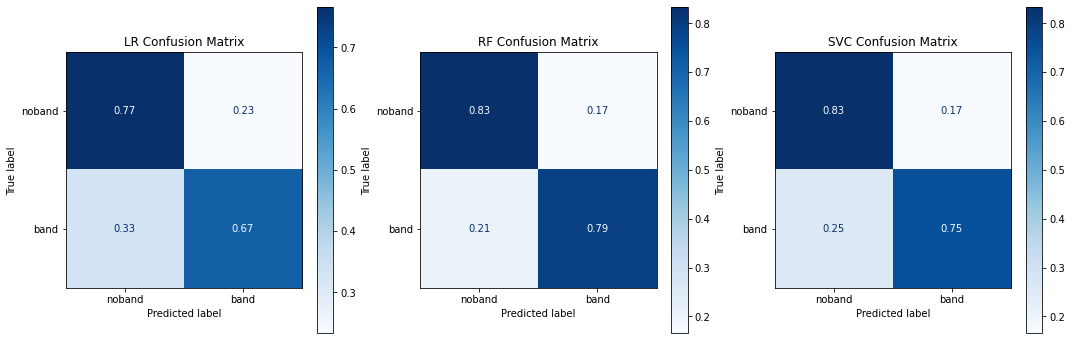

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(18, 6),facecolor='w', edgecolor='k',ncols=3)



plot_confusion_matrix(clf_LR, X_test, y_test,
                      cmap=plt.cm.Blues,
                      normalize="true",
                      display_labels=['noband', 'band'],
                      ax=axes[0])
axes[0].set(title='LR Confusion Matrix')

plot_confusion_matrix(clf_RF, X_test, y_test,
                      cmap=plt.cm.Blues,
                      normalize="true",
                      display_labels=['noband', 'band'],
                      ax=axes[1])
axes[1].set(title='RF Confusion Matrix')

plot_confusion_matrix(clf_SVC, X_test, y_test,
                      cmap=plt.cm.Blues,
                      normalize="true",
                      display_labels=['noband', 'band'],
                      ax=axes[2])
axes[2].set(title='SVC Confusion Matrix')

* Specificity (True：noband，预测：noband）比 Sensitivity（True: band, 预测：band）更高 - 可能是因为我们的数据包括更多的noband样本，所以每个模型有更多机会明白noband的features是怎样的
* 可是False Negative （True： band， 预测：noband）比 False Positive高，所以可能因为noband的数据多，模型更多时候预测noband
* RF模型最佳

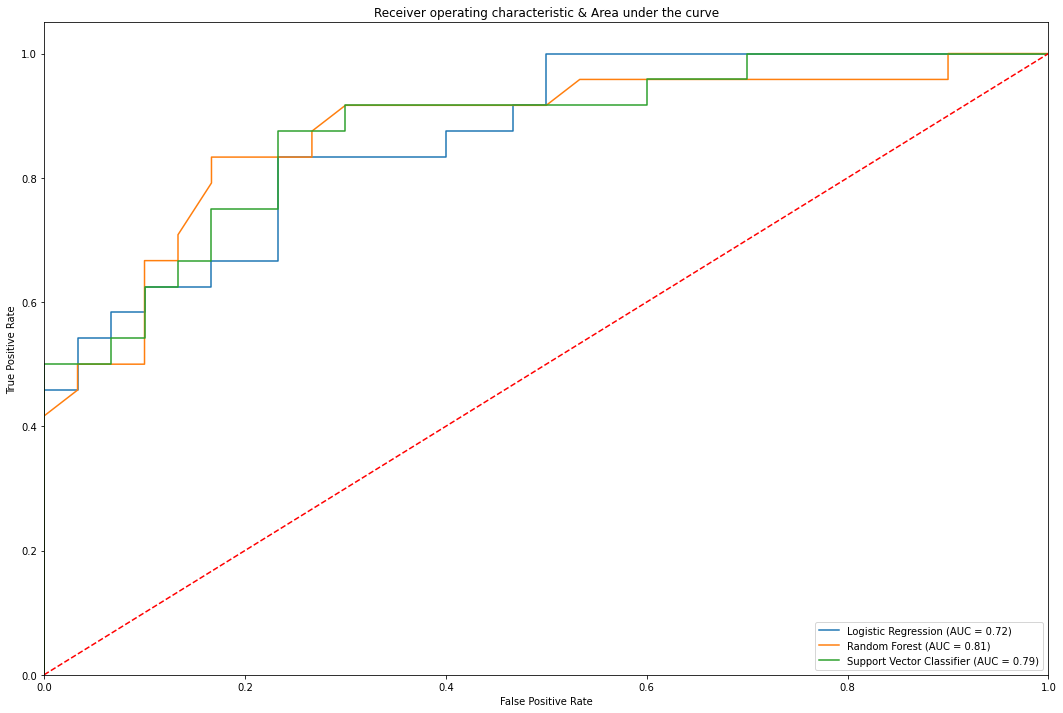

In [12]:
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, plot_confusion_matrix

fig, axes = plt.subplots(figsize=(18,12), facecolor='w', edgecolor='k')

logit_roc_auc = roc_auc_score(y_test, clf_LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_LR.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)

logit_roc_auc = roc_auc_score(y_test, clf_RF.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_RF.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % logit_roc_auc)

logit_roc_auc = roc_auc_score(y_test, clf_SVC.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_SVC.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Support Vector Classifier (AUC = %0.2f)' % logit_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic & Area under the curve')
plt.legend(loc="lower right")
plt.show()

* True Positive Rate等于大概0.8之后每个模型的False Positive Rate增长得很快（从FPR=0.25到0.55的那个长线），因为那时候如果想把TPR更高，当然会有更多错误
* 每个模型的AUC比随机（0.5）好
* 如果我们想没有False Positives的预测， TPR大概是0.5

1.2.（共4分）请利用"BASKET.txt"数据集进行分析。  
作业具体要求如下：

1.2.1 探索性数据分析（2分）  
(1) 分析数据集中除cardid以外各个字段分布情况，并绘图展示（1分）；  
(2) 分析支付方式（pmethod）与金额（value）、性别（sex）、是否有房屋（homeown），收入（income）、年龄（age）之间的关系；请大家分别分析支付方式与题目中所列其他各变量之间的关系（1分）。

In [ ]:
df = pd.read_csv("BASKETS.txt")
df.head()

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,39808,42.7123,CHEQUE,M,NO,27000,46,F,T,T,F,F,F,F,F,F,F,T
1,67362,25.3567,CASH,F,NO,30000,28,F,T,F,F,F,F,F,F,F,F,T
2,10872,20.6176,CASH,M,NO,13200,36,F,F,F,T,F,T,T,F,F,T,F
3,26748,23.6883,CARD,F,NO,12200,26,F,F,T,F,F,F,F,T,F,F,F
4,91609,18.8133,CARD,M,YES,11000,24,F,F,F,F,F,F,F,F,F,F,F


In [ ]:
# 不需要
df.drop("cardid",axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   value          1000 non-null   float64
 1   pmethod        1000 non-null   object 
 2   sex            1000 non-null   object 
 3   homeown        1000 non-null   object 
 4   income         1000 non-null   int64  
 5   age            1000 non-null   int64  
 6   fruitveg       1000 non-null   object 
 7   freshmeat      1000 non-null   object 
 8   dairy          1000 non-null   object 
 9   cannedveg      1000 non-null   object 
 10  cannedmeat     1000 non-null   object 
 11  frozenmeal     1000 non-null   object 
 12  beer           1000 non-null   object 
 13  wine           1000 non-null   object 
 14  softdrink      1000 non-null   object 
 15  fish           1000 non-null   object 
 16  confectionery  1000 non-null   object 
dtypes: float64(1), int64(2), object(14)
memory usage: 132

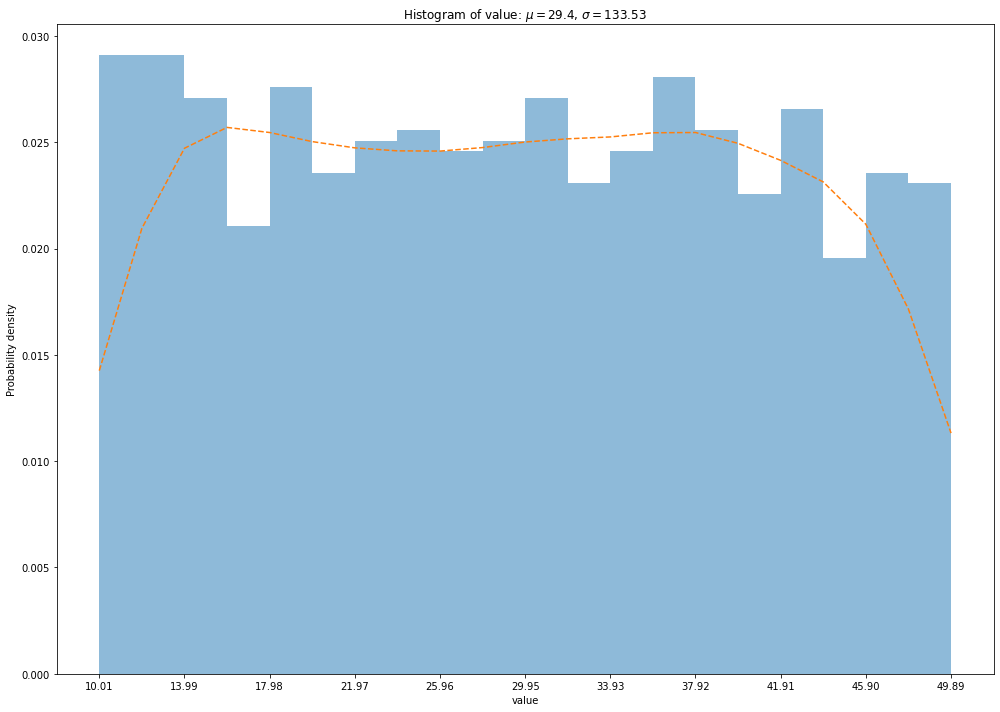

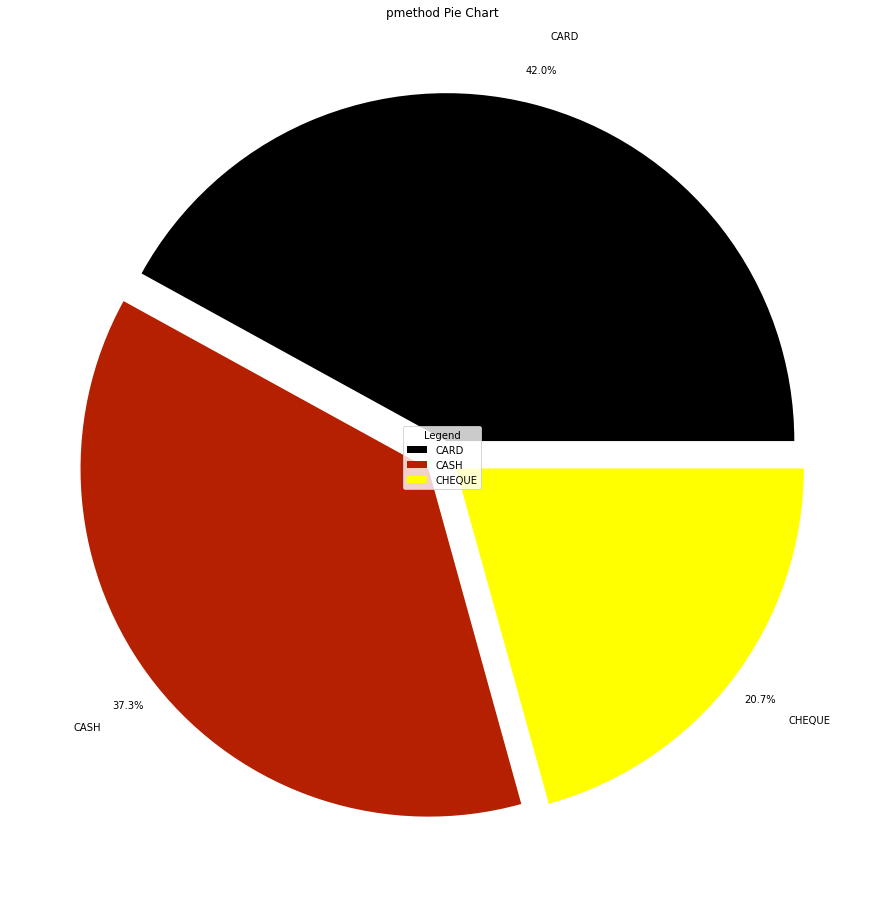

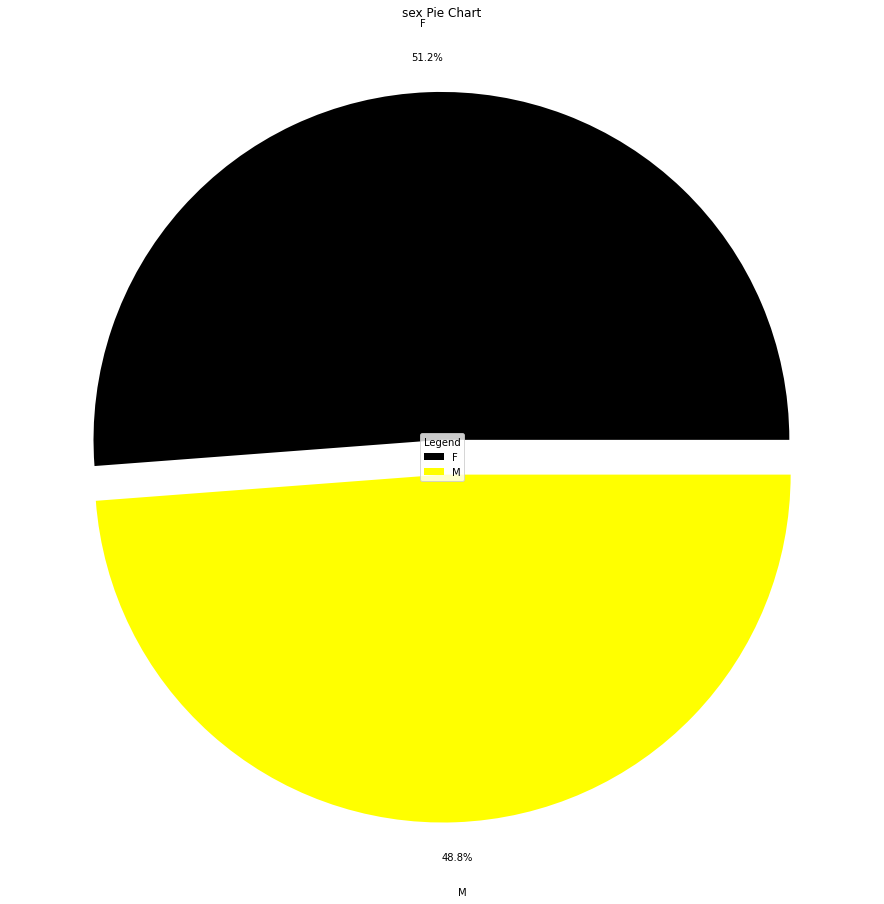

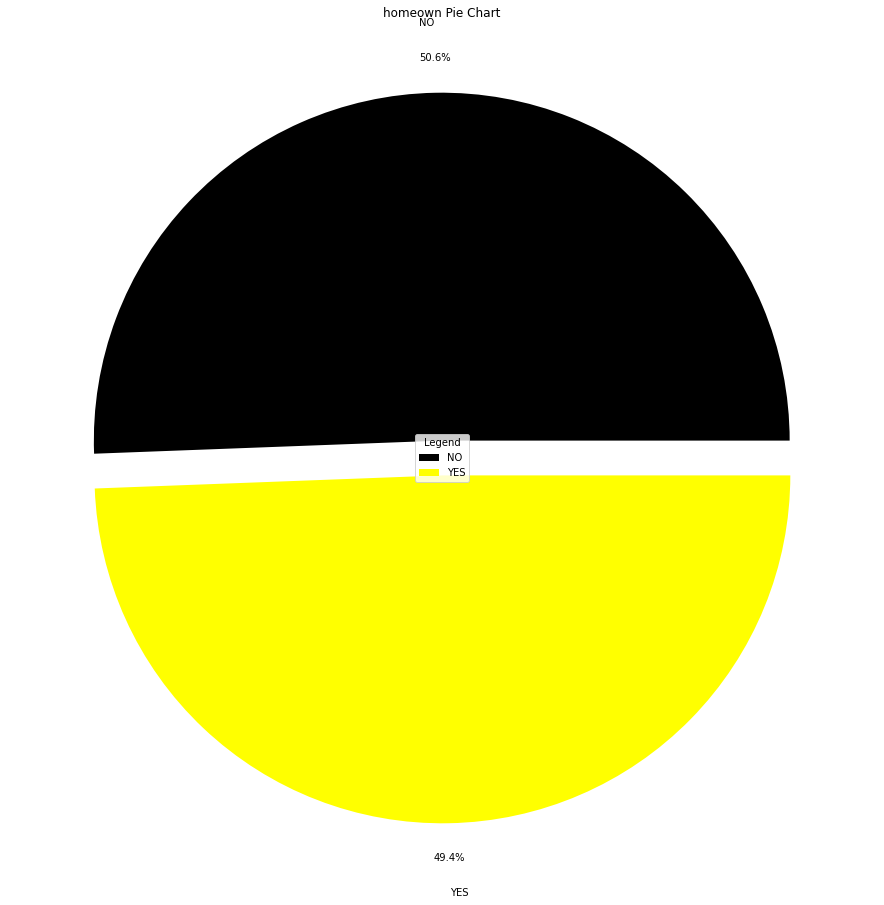

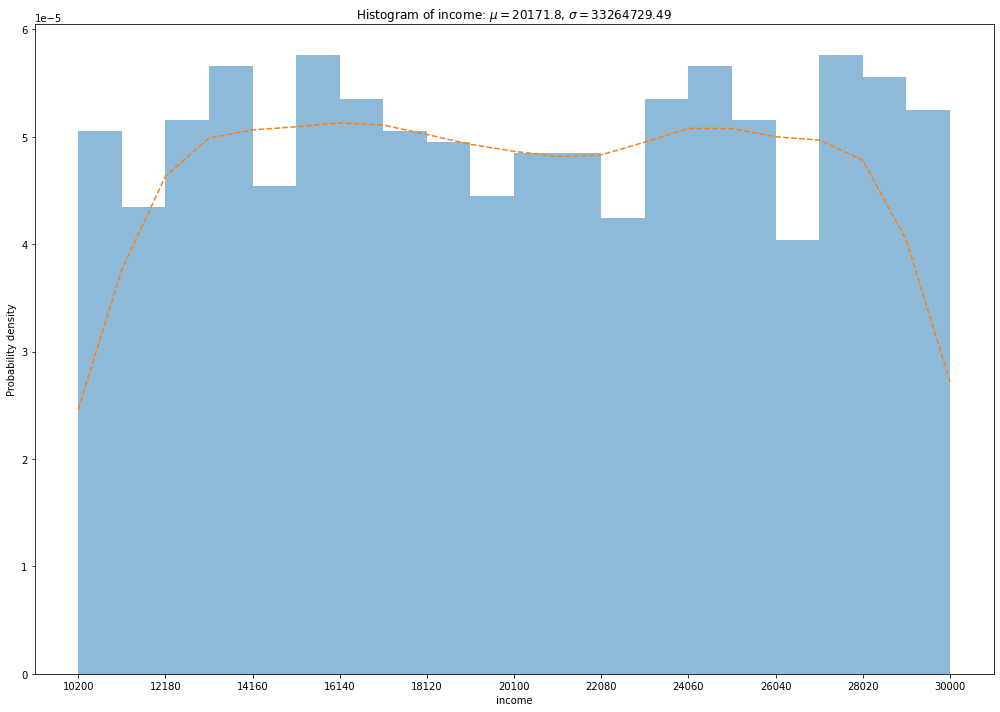

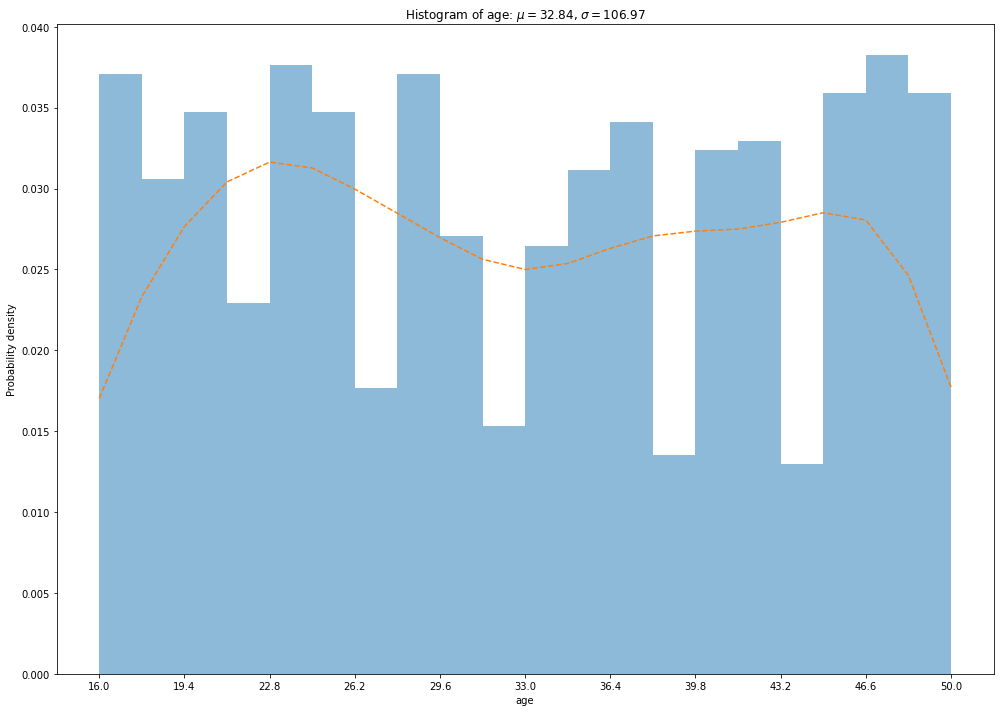

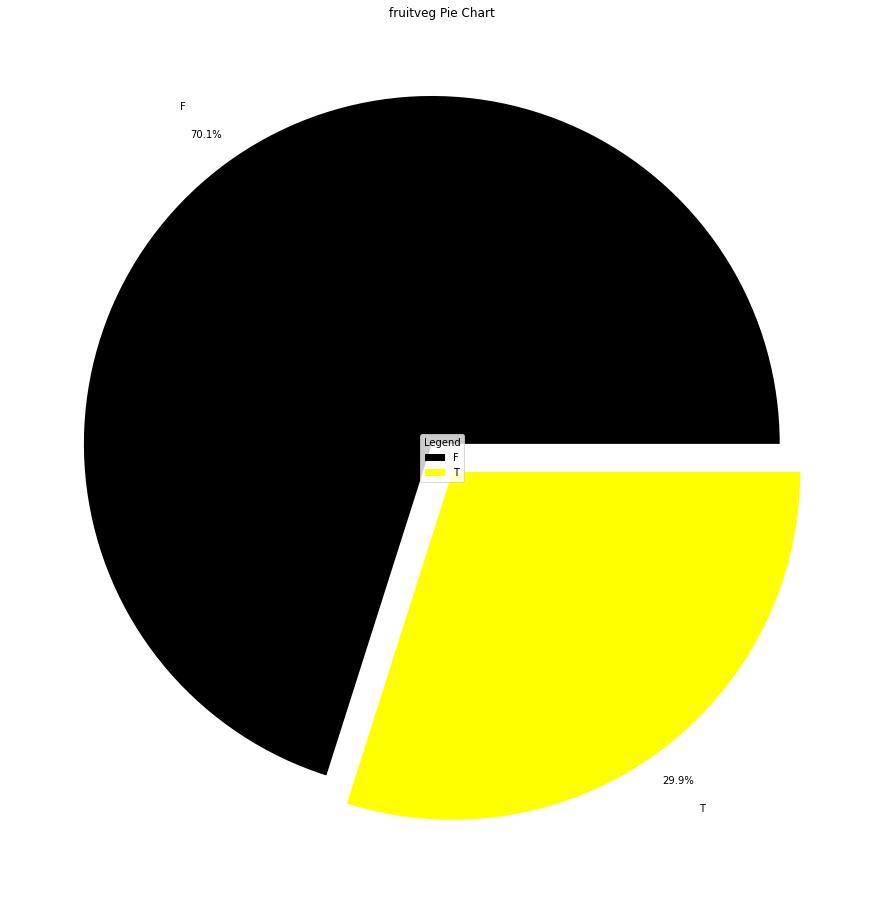

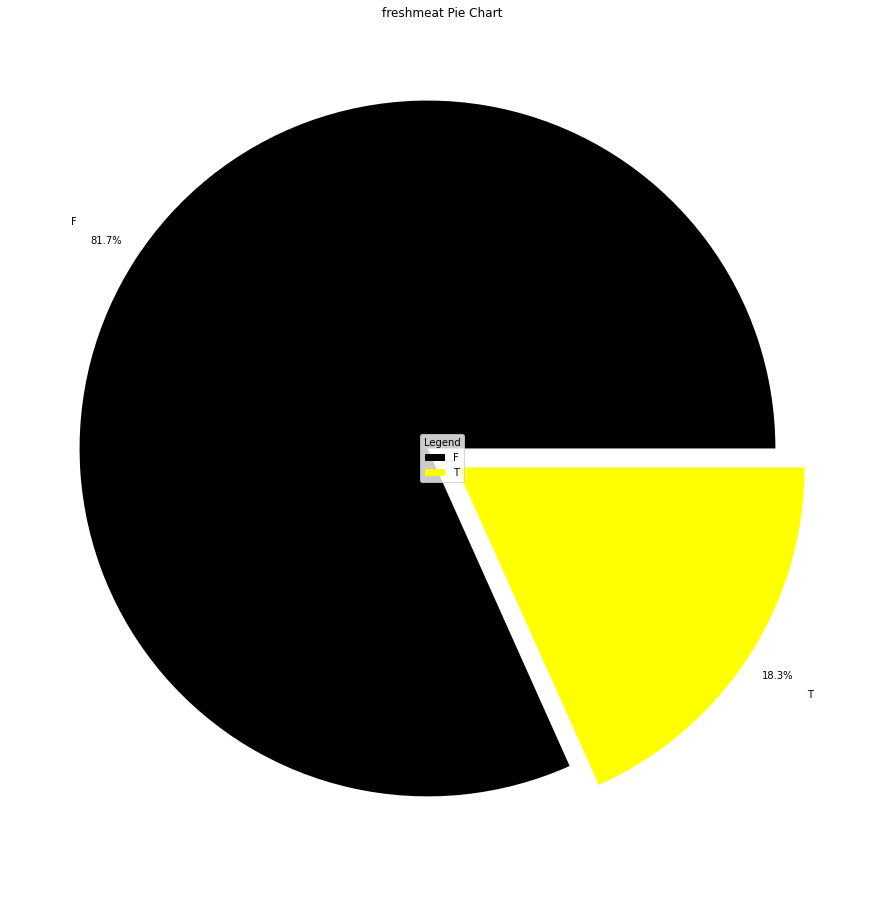

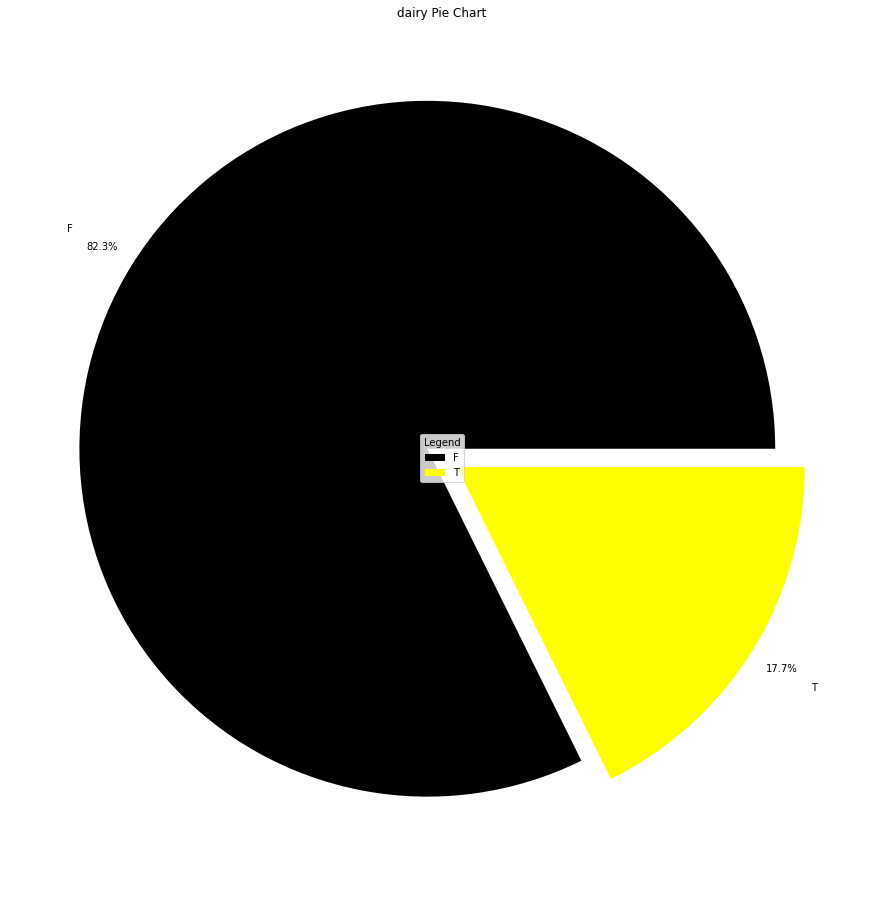

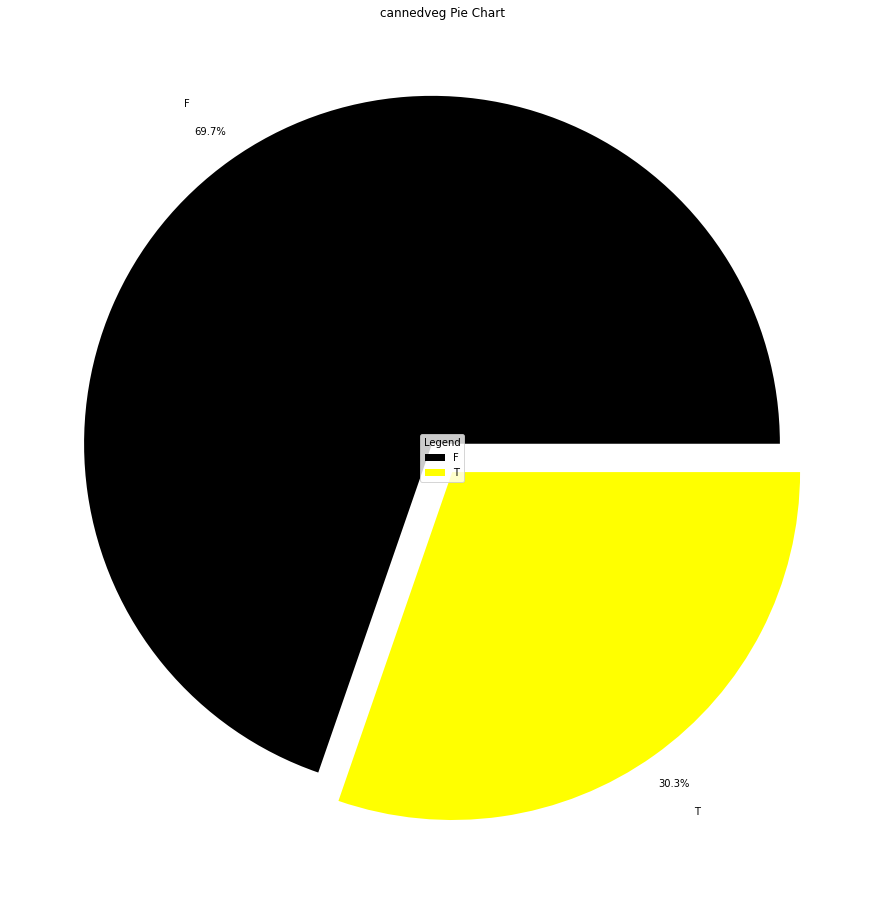

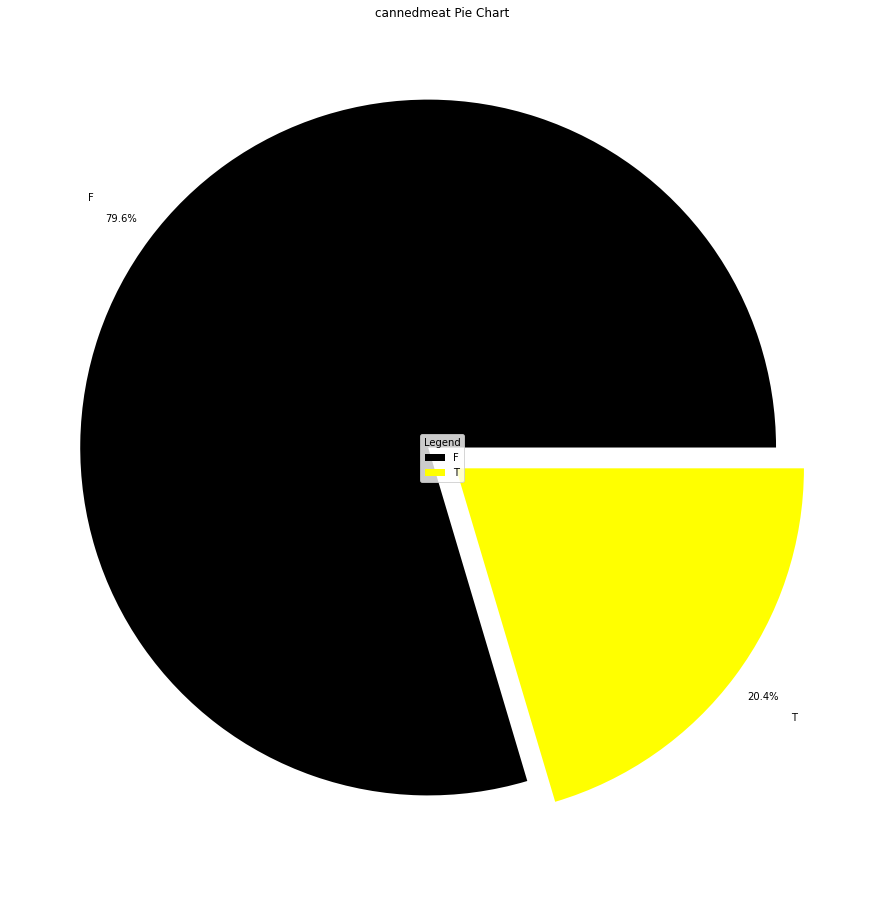

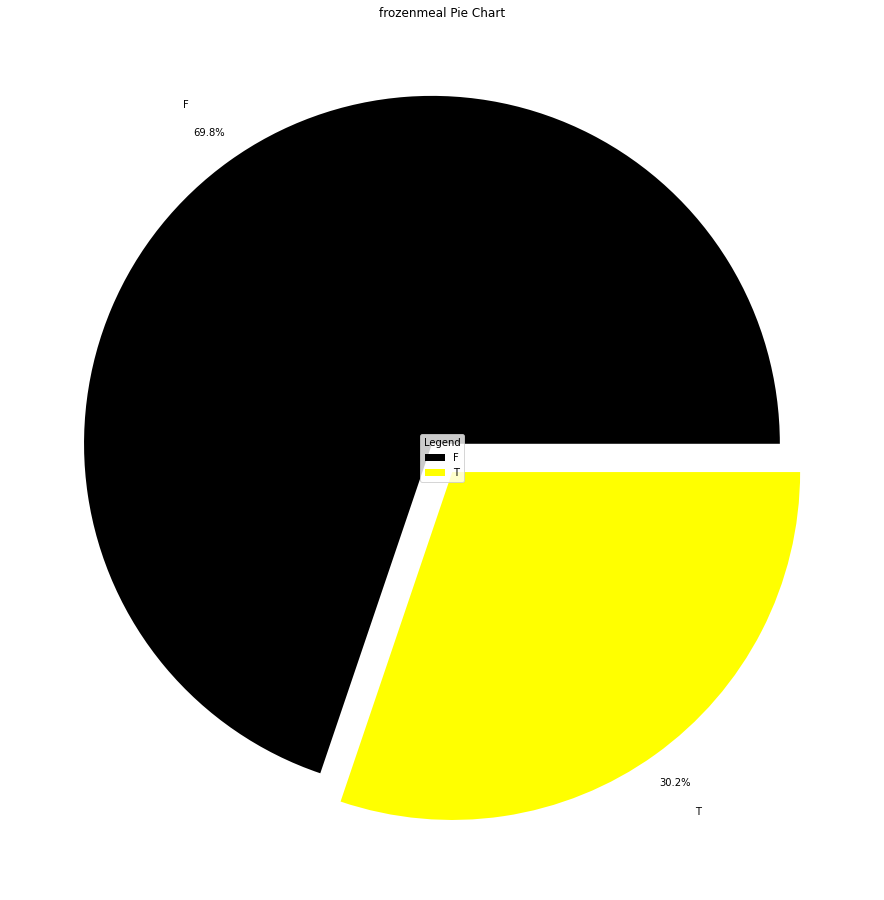

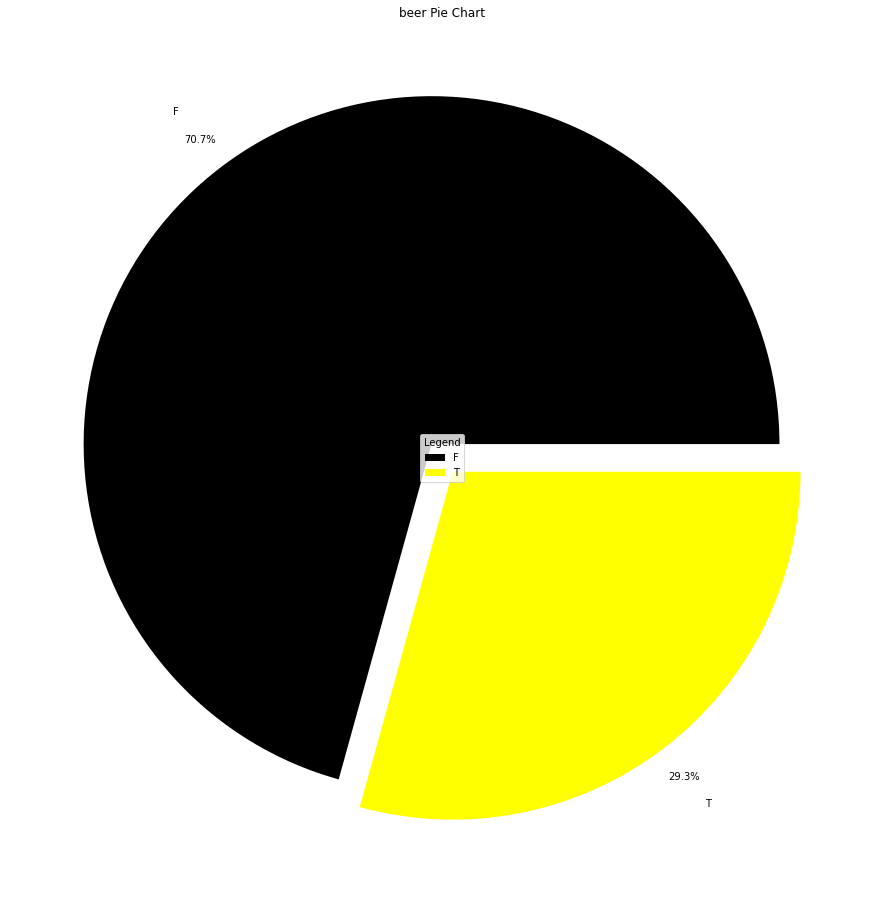

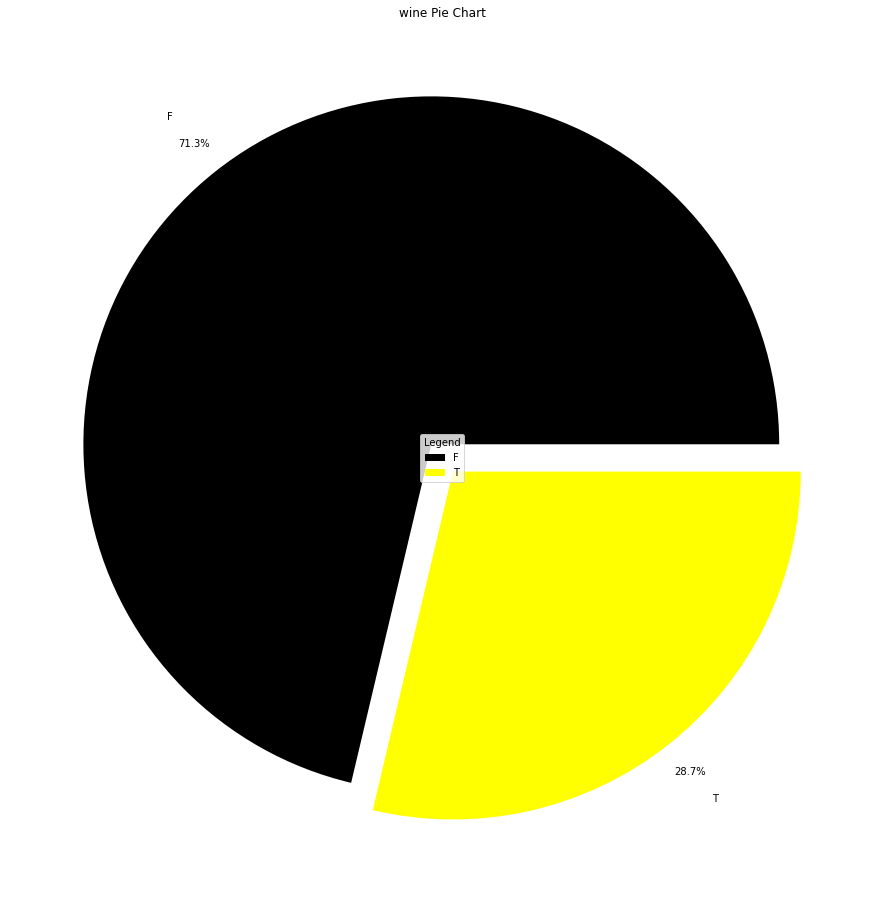

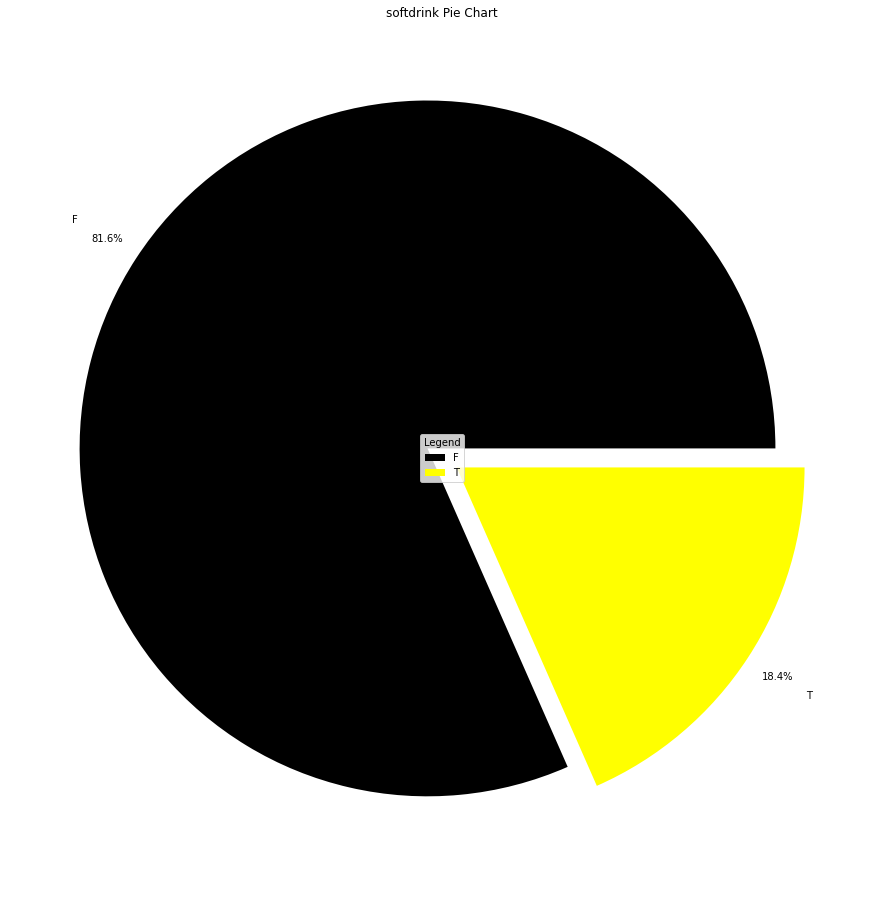

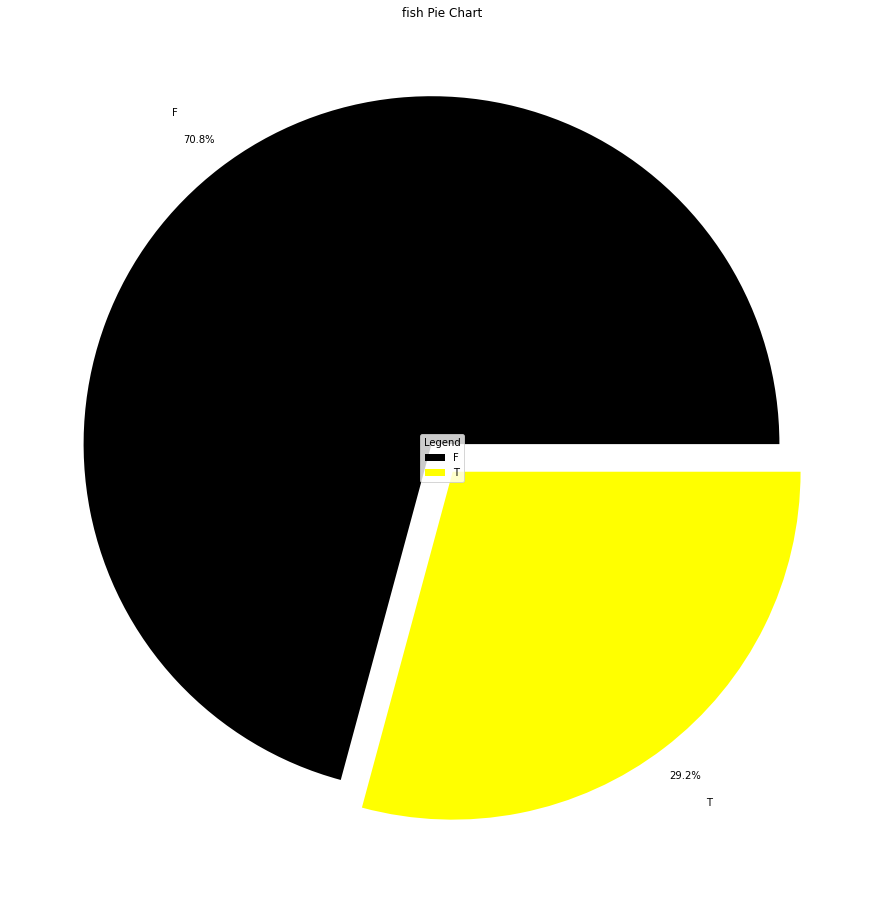

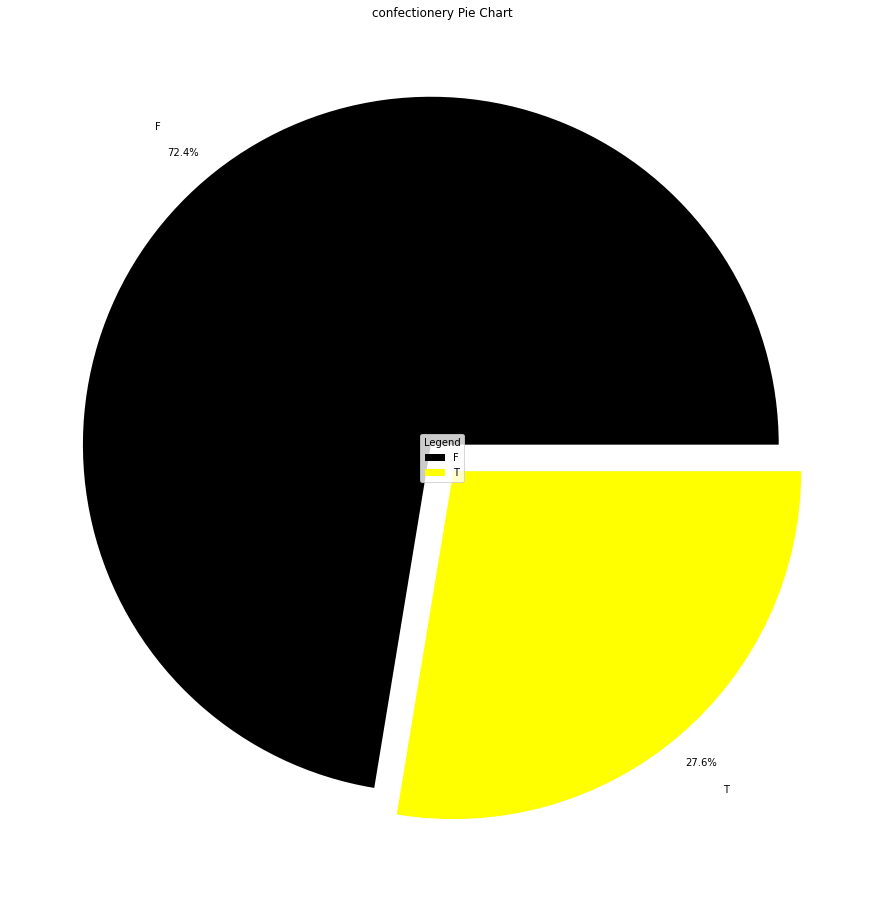

In [ ]:
from scipy.stats import kde

num_bins = 20

for col in df:


  if df[col].dtype.name in ["int64", "float64"]:

    ### Numeric Graph ###

    sub_data = df.copy()
    sub_data.drop(sub_data.loc[sub_data[col].isnull()].index, inplace=True)

    # Estimate PDF (Probability Density Function)
    density = kde.gaussian_kde(sub_data[col].values)
    x = np.linspace(sub_data[col].min(),sub_data[col].max(),num_bins+1)
    y = density(x)

    fig, ax = plt.subplots(figsize=(14,10), facecolor='w', edgecolor='k')

    # Set ticks on x-axis based on bins
    plt.xticks(x[::2])

    # the histogram of the data
    y_array, x_array, patches = ax.hist(sub_data[col], num_bins, density=True, alpha=0.5)

    mu = round(sub_data[col].mean(), 2)
    var = round(sub_data[col].var(), 2)

    ax.plot(x_array, y, '--')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of {}: $\mu={}$, $\sigma={}$'.format(col, mu, var))


    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

  else:

    sub_data = df[col].value_counts()
    sub_data = sub_data.sort_index()

    fig, ax = plt.subplots(figsize=(16,16), facecolor='w', edgecolor='k', nrows=1)

    explode = [0.05] * len(sub_data.index)

    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0, 1, len(sub_data.index))]

    fig = ax.pie(sub_data.values, autopct='%1.1f%%', colors=colors,
                 labeldistance=1.2, pctdistance=1.1, explode=explode,
                 labels=sub_data.index)
       
       
    ax.legend(labels=sub_data.index,
                loc='center',
                title="Legend")

    plt.title("{} Pie Chart".format(col))

- Value是从10到41的
- 每个pmethod的百分之差不多 - 为什么CHEQUE是那么高？这个数据应该很久, 因为这个时代用CHEQUE的人哪里都少
- Age是从16到50
- cannedveg的T（应该是是否买）最高；fruitveg也差不多

In [ ]:
# pmethod和Age，income，value
df.groupby(["pmethod"]).agg({'value': ['sum', 'mean'],
                             'income': ['sum', 'mean'],
                             'age': ['mean', 'median']})

value              income                      age       
                sum       mean      sum          mean       mean median
pmethod                                                                
CARD     12470.3782  29.691377  8492100  20219.285714  32.921429     34
CASH     11020.7694  29.546299  7571200  20298.123324  32.509383     32
CHEQUE    5907.0920  28.536676  4108500  19847.826087  33.270531     33

In [ ]:
# pmethod和性别
sub_sex = df.groupby(["pmethod", "sex"]).agg({'sex': 'count'})
sub_sex.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()), 2))

sex
pmethod sex       
CARD    F    51.19
        M    48.81
CASH    F    48.79
        M    51.21
CHEQUE  F    55.56
        M    44.44

In [ ]:
sub_home = df.groupby(["pmethod", "homeown"]).agg({'homeown': 'count'})
sub_home.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()), 2))

homeown
pmethod homeown         
CARD    NO         46.67
        YES        53.33
CASH    NO         52.55
        YES        47.45
CHEQUE  NO         55.07
        YES        44.93

* 用CARD, CASH 和 CHEQUE 的人相似 - value的平均值都是28 +-1, income的平均值是20000 +- 300 age的平均值是33 +-1

* 可是用CHEQUE的人55.56%是女人；男人比女人多用CASH

* 用CARD的人，53.33%有房子，用CHEQUE的人只是44.93% - 可能如果一个人有房子，他为了贷款肯定也有银行账户，所以也有银行信用卡

1.2.2 关联规则挖掘（2分）  
(1) 利用fruitveg, freshmeat, dairy, cannedveg, cannedmeat, frozenmeal, beer, wine, softdrink, fish, confectionery字段进行关联规则挖掘
，可自行指定最小支持度和最小置信度阈值，并给出理由（1分）；     
(2) 选出至少4条找到的关联规则进行比较和解释（1分）。

In [ ]:
!pip install -q efficient_apriori

In [ ]:
sub_df = df[["fruitveg", "freshmeat", "dairy", "cannedveg", "cannedmeat", "frozenmeal", "beer", "wine", "softdrink", "fish", "confectionery"]]
sub_df.head(5)

,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,F,T,T,F,F,F,F,F,F,F,T
1,F,T,F,F,F,F,F,F,F,F,T
2,F,F,F,T,F,T,T,F,F,T,F
3,F,F,T,F,F,F,F,T,F,F,F
4,F,F,F,F,F,F,F,F,F,F,F


In [ ]:
transactions = []
for i, row in sub_df.iterrows():
  transactions.append(tuple(row[row == "T"].index))

In [ ]:
# 从给的物品什么都没买
no_buy = len(sub_df[~sub_df[sub_df == "F"].isnull().any(axis=1)])
no_buy

60

In [ ]:
from efficient_apriori import apriori
# >=十次买的东西 （>=1%的transactions） ； Confidence最高
itemsets, rules = apriori(transactions, min_support=10/1000,  min_confidence=1)
print(rules)

[{beer, cannedmeat, freshmeat, frozenmeal} -> {cannedveg}, {beer, cannedmeat, cannedveg, freshmeat} -> {frozenmeal}, {beer, cannedmeat, frozenmeal, fruitveg} -> {cannedveg}, {cannedveg, frozenmeal, fruitveg, wine} -> {beer}, {beer, cannedmeat, fish, frozenmeal} -> {cannedveg}, {beer, cannedmeat, cannedveg, fish} -> {frozenmeal}, {beer, fish, freshmeat, frozenmeal} -> {cannedveg}, {beer, cannedveg, fish, freshmeat} -> {frozenmeal}]


In [ ]:
# 都是关于5个产品
# 分析最前4个：

print(itemsets[5])

# {beer, cannedmeat, freshmeat, frozenmeal} -> {cannedveg}

print(itemsets[5][('beer', 'cannedmeat', 'cannedveg', 'freshmeat', 'frozenmeal')])

# {beer, cannedmeat, cannedveg, freshmeat} -> {frozenmeal}

print(itemsets[5][('beer', 'cannedmeat', 'cannedveg', 'freshmeat', 'frozenmeal')])

# {beer, cannedmeat, frozenmeal, fruitveg} -> {cannedveg}

print(itemsets[5][('beer', 'cannedmeat', 'cannedveg', 'frozenmeal', 'fruitveg')])

# {cannedveg, frozenmeal, fruitveg, wine} -> {beer}

print(itemsets[5][('beer', 'cannedveg', 'frozenmeal', 'fruitveg', 'wine')])

{('beer', 'cannedmeat', 'cannedveg', 'freshmeat', 'frozenmeal'): 11, ('beer', 'cannedmeat', 'cannedveg', 'frozenmeal', 'fruitveg'): 10, ('beer', 'cannedmeat', 'cannedveg', 'frozenmeal', 'wine'): 11, ('beer', 'cannedveg', 'frozenmeal', 'fruitveg', 'wine'): 11, ('beer', 'cannedmeat', 'cannedveg', 'fish', 'frozenmeal'): 12, ('beer', 'cannedveg', 'fish', 'frozenmeal', 'wine'): 14, ('beer', 'cannedveg', 'fish', 'frozenmeal', 'fruitveg'): 22, ('beer', 'fish', 'frozenmeal', 'fruitveg', 'wine'): 10, ('beer', 'cannedveg', 'fish', 'freshmeat', 'frozenmeal'): 10}
11
11
10
11


* 虽然前2个的5个产品是一样的，但规则是不同的 - 第1个预测cannedveg;第2个预测frozenmeal
* 都是关于5个产品，因为min_confidence是1，所以每个买{beer, cannedmeat, freshmeat, frozenmeal}的客户也买了{cannedveg} ；如果只有2个产品，min_confidence等于1不太可能 - 比如 {beer} -> {cannedveg}
* 比较有意思的一个事情是 -> {肉/鱼} （比如cannedmeat,freshmeat,fish) 的规则都没有。在美国，大概5%的人是素食主义者(https://en.wikipedia.org/wiki/Vegetarianism_by_country#:~:text=A%202018%20study%20from%20Economic,the%20upper%2Dcaste%20Indians%20are)。由于min_confidence是1，所以不太可能有人每次购买其他产品时都购买某种肉类。
* 同时，罐头蔬菜-> {cannedveg}有两个规则，因为一般来说，每个人都会吃某种蔬菜，另外它是一个很好的配菜。 
- 每个规则都出现大约10次，所以数据的1% 
- 如果这是我的超市，那我会跟我的人员说：如果你们看一个买啤酒，肉 (罐头和新鲜的），冷冻餐 的人，给他推荐也买蔬菜罐头!


### 第二部分：社会网络分析（本部分满分5分）

数据：MAG数据可视化领域的数据（和之前的练习、作业相同的数据）。

2.1 请构建作者和作者之间的合著网络（节点：作者；无向边：两个作者之间存在合著关系，即他们至少一次同时出现在一篇论文的作者列表中；边的权重：两个作者间的合著次数）。计算以下指标或回答以下问题（共2.75分）：

（1）网络中节点的数量（0.25分）；

（2）网络中边的数量（0.25分）；

（3）网络的平均聚类系数（Average clustering coefficient）（0.25分）；

（4）网络的密度（0.25分）；

（5）对边权的分布做可视化，并对可视化结果做简要描述（0.5分，其中可视化0.25分，描述0.25分）；

（6）对节点的度分布进行描述（0.5分，其中对度分布进行适当的可视化0.25分，对结果做描述0.25分）；

（7）选择网络中节点度数最高的5个节点，然后计算它们的三种中心性（0.75分）。

In [ ]:
import networkx as nx

df = pd.read_csv("./author2paper_table.txt", sep=";")
df

,paper_id,author_id,author_sequence_number
0,271214,2000415444,1
1,271214,2572028590,2
2,1216968,2103945787,1
3,1216968,2155380330,3
4,1216968,2506879740,2
...,...,...,...
58134,2908398712,2908096397,11
58135,2908398712,2908118657,9
58136,2908398712,2908365158,7
58137,2908398712,2908395519,6


In [ ]:
sub_df = df.groupby('paper_id').agg({'author_id':'unique'}).reset_index()
sub_df

,paper_id,author_id
0,271214,"[2000415444, 2572028590]"
1,1216968,"[2103945787, 2155380330, 2506879740]"
2,1405581,[2344591298]
3,1467391,"[2204913924, 2206745903]"
4,2004025,"[2338063915, 2338995952, 2340820710, 234177837..."
...,...,...
17408,2908310144,"[2580394487, 2776958842]"
17409,2908374151,"[2796823696, 2797894246]"
17410,2908395709,"[2260616120, 2567489210, 2770181487]"
17411,2908398712,"[2906700731, 2906702210, 2906710819, 290700695..."


In [ ]:
# 给出所有的pairs
coauthor_dict = {}
for pair in sub_df["author_id"].values:
  sub_pairs = [(pair[i],pair[j]) for i in range(len(pair)) for j in range(i+1, len(pair))]
  for sub_pair in sub_pairs:
    coauthor_dict.setdefault(tuple(sub_pair), 0)
    coauthor_dict[tuple(sub_pair)] += 1

# 创建graph
G = nx.Graph()
for k,v in coauthor_dict.items():
  G.add_edge(k[0],k[1], weight=v)

In [ ]:
# 节点和边的数量
len(G.nodes), len(G.edges)

(39898, 97380)

In [ ]:
# 平均聚类系数
cc = nx.clustering(G)
avg_clust = sum(cc.values()) / len(cc)
print(avg_clust)
# 很多的节点的clustering coefficient是1  - 因为他们只有只有一个Connection

0.8164392697897124


In [ ]:
# 密度
nx.density(G)
# 0.01% ; 比较小，因为大部分的作者只有跟另一个作者合著

0.00012235124675072349

32


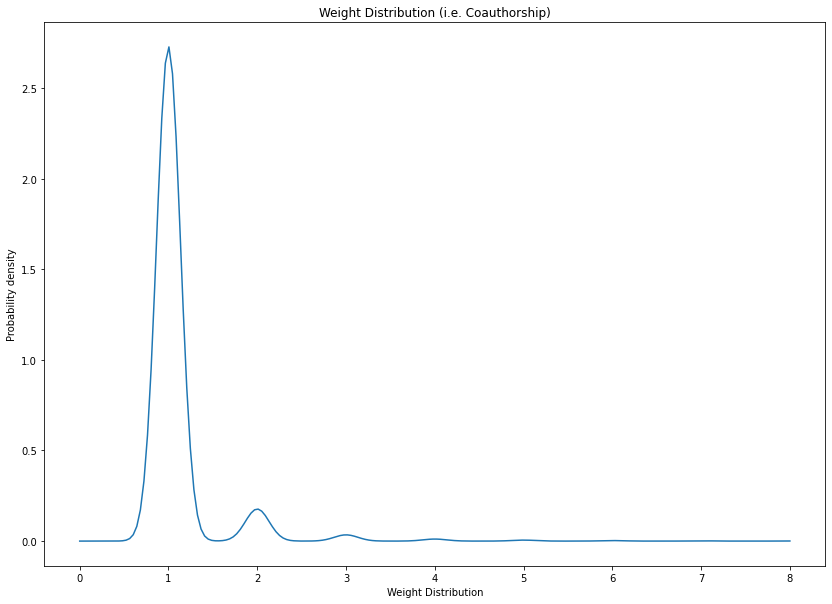

In [ ]:
# 对边权的分布做可视化
data = list(coauthor_dict.values())
print(max(data))

fig, ax = plt.subplots(figsize=(14,10), facecolor='w', edgecolor='k')

density = kde.gaussian_kde(data)

xs = np.linspace(0,8,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))

ax.set_xlabel('Weight Distribution')
ax.set_ylabel('Probability density')
ax.set_title('Weight Distribution (i.e. Coauthorship)')

plt.show()

* 权越高越不可能，数据中的大多数作者只写了一篇论文
* 大于90%的边权是1
* 最高的权是32 - 所以有2个作者，他们32次合著了

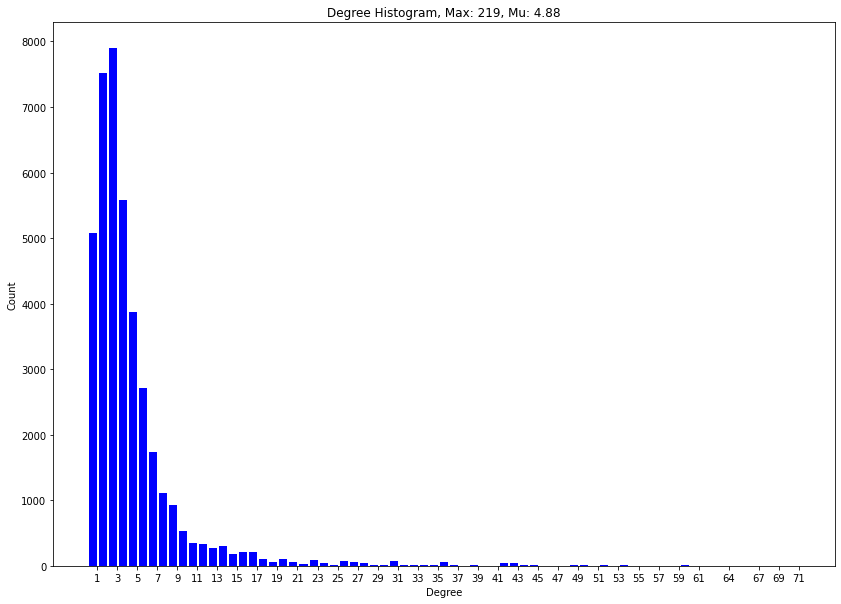

In [ ]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())


fig, ax = plt.subplots(figsize=(14,10), facecolor='w', edgecolor='k')
plt.bar(deg[20:], cnt[20:], width=0.80, color="b")

mu = round(sum([d * c for d,c in zip(deg,cnt)]) / sum(cnt), 2)

plt.title("Degree Histogram, Max: {}, Mu: {}".format(max(deg), mu))
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg[20::2]])
ax.set_xticklabels(deg[20::2])
print()

* 大于50%的作者有小于4的edges；因为这方面，刚才算出来的密度也很小 ； edge的平均值是4.88
* 离群值多 - 最高的是219
* 3个edges是最常见的 （mode）- 就是说大部分的作者跟三个别的作者合著
* 有意思的一个问题那个3是因为很多论文有4个作者还是每个作者一般写了两个论文，每次跟一个其他人？

In [ ]:
# 度数最高
top_deg = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
top_nodes = {i for i,j in top_deg}
top_deg

[(2122423217, 219),
 (2150576810, 148),
 (2147343253, 138),
 (2122502592, 127),
 (2083449707, 125)]

In [ ]:
# degree centrality ; O(V^2) > 39898^2
print("Degree Centrality:\n", sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5])

Degree Centrality:
 [(2122423217, 0.005489134521392586), (2150576810, 0.003709552096648871), (2147343253, 0.0034589066847131363), (2122502592, 0.0031831967315838284), (2083449707, 0.0031330676491966815)]


In [ ]:
# betweenness centrality of network 这个非常慢, 因为它的复杂度是 O(V^3) 39898^3, 所以我们用k参数成为1%的数据
k = len(G.nodes) // 100
bet_cen = sorted(nx.betweenness_centrality(G, k=k).items(), key=lambda x: x[1], reverse=True)
print("Betweenness Centrality最高的5个节点:\n", bet_cen[:5])

print("度数最高5个节点的Betweenness Centrality")
for i,j in bet_cen:
  if i in top_nodes:
    print(i,j)

Betweenness Centrality最高的5个节点:
 [(2147343253, 0.005984352611347983), (2122423217, 0.005064248894973948), (2136127216, 0.004345891535839252), (2123746788, 0.0037409894762779963), (668764113, 0.0031367928020196094)]
度数最高5个节点的Betweenness Centrality
2147343253 0.005984352611347983
2122423217 0.005064248894973948
2122502592 0.0029981771255409083
2150576810 0.0021698912566085397
2083449707 0.0004951616292838975


In [ ]:
# closeness centrality of network
clo_cen = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)
print("Closeness Centrality 最高的5个节点:\n", clo_cen[:5])

print("度数最高5个节点的Closeness Centrality")
for i,j in clo_cen:
  if i in top_nodes:
    print(i,j)

Closeness Centrality 最高的5个节点:
 [(2136127216, 0.05998917441784463), (2122423217, 0.05851148083883982), (2147343253, 0.057177181867008174), (2237445521, 0.05706225658412693), (2120088882, 0.05577660635022275)]
度数最高5个节点的Closeness Centrality
2122423217 0.05851148083883982
2147343253 0.057177181867008174
2122502592 0.054502008564606894
2150576810 0.05358935504929151
2083449707 0.05130862459099197


2.2 请构建论文和论文之间的引用网络（节点：论文，有向边：论文A引用了论文B，意即论文B出现在了A的参考文献列表中，边的权重：无）。计算以下指标或回答以下问题（共1.75分）：

（1）找出两个你认为比较“重要”的节点（建议使用上课提到的三种中心性），然后计算它们之间的最短路径（0.5分）；

（2）从现在的引用网络中构建一个子网络，这个子网络的所有节点在原引用网络都至少被引5次，这个子网络的边即上述筛选过的节点之间的引用关系。请使用边列表（edgelist）的形式将这个子网络写（write）入一个文件中。（1.25分，其中正确的建立子网络1分，写入文件0.25分）；


In [ ]:
df = pd.read_csv("./citation_table.txt", sep=";")
df

,citing_id,cited_id
0,21951,598396932
1,27257,1595973166
2,55078,2018663161
3,110314,2103901064
4,122273,3984209
...,...,...
230161,2908481761,2099789128
230162,2908482163,2167340365
230163,2908490631,2184040007
230164,2908493288,2767312243


In [ ]:
sub_df = df.groupby('citing_id').agg({'cited_id':'unique'}).reset_index()
sub_df

,citing_id,cited_id
0,21951,[598396932]
1,27257,[1595973166]
2,55078,[2018663161]
3,110314,[2103901064]
4,122273,[3984209]
...,...,...
149496,2908481761,[2099789128]
149497,2908482163,[2167340365]
149498,2908490631,[2184040007]
149499,2908493288,[2767312243]


In [ ]:
# Directed Graph
G = nx.DiGraph()

for i, row in sub_df.iterrows():
  for c in row["cited_id"]:
    G.add_edge(row["citing_id"],c)

In [ ]:
k = len(G.nodes) // 100
bet_cen = sorted(nx.betweenness_centrality(G, k=k).items(), key=lambda x: x[1], reverse=True)[:50]

deg_cen = sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:50]

clo_cen = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:50]

# 看哪个节点的每个中心性最好 ; 如果betweenness_centrality高，两个节点之间有路径的可能性也高一点，所以用0.8的权让它更重要
top = {}
for i, (node, score) in enumerate(deg_cen):
  top[node] = (100-i) * 0.1

for i, (node, score) in enumerate(clo_cen):
  top.setdefault(node, 0)
  top[node] += (100-i) * 0.1

for i, (node, score) in enumerate(bet_cen):
  top.setdefault(node, 0)
  top[node] += (100-i) * 0.8

# 最好十个
top10 = sorted(top.items(), key=lambda x: x[1], reverse=True)[:10]
top10

[(2109574129, 88.9),
 (2171073562, 85.2),
 (2142068257, 84.60000000000001),
 (2165662062, 82.9),
 (2005821483, 80.2),
 (2047503975, 78.4),
 (2110080554, 76.0),
 (2134678736, 75.2),
 (2152621157, 74.4),
 (2323909273, 73.60000000000001)]

In [ ]:
if nx.has_path(G, top10[0][0], top10[1][0]):
  print(top10[0][0], top10[1][0])
  print("SHORTEST PATH: ", nx.shortest_path(G, top10[0][0], top10[1][0]))

2109574129 2171073562
SHORTEST PATH:  [2109574129, 1995224664, 2141653286, 2171073562]


In [ ]:
remove_list = [node for node,degree in dict(G.degree()).items() if degree < 5]

print("久节点数量：", len(G.nodes))

G.remove_nodes_from(remove_list)

print("新节点数量：", len(G.nodes))

nx.write_edgelist(G,'graph.edgelist')

久节点数量： 156760
新节点数量： 12661


2.3 简要回答（不超过200字）：什么是六度分割理论？它有什么应用？（0.5分）

根据六度分隔理论，地球上任何两个人之间平均有5个熟人相隔。所以通过6个连接，可以到任何一个人。
应用例如:
* 病毒扩展：如果一个人有高度感染性的病毒，我们知道地球上的每一个人与该病毒只有六度的距离。所以需要：
a) 尝试通过距离增加人们之间的度数
b) 追踪人们的朋友，直至6度
* 信息扩展: 如果我得到一个信息，一颗小行星将在30分钟内撞击地球，而每个人需要5分钟让他的朋友们知道，那么就有可能在它撞击之前可以让地球上的所有人知道。他们就可以保护自己。(5 * 6 = 30)